In [1]:
#try:
  # This command only in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2025-07-06 21:02:27.986217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-06 21:02:28.803609: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-06 21:02:28.806387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-06 21:02:32.623527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [33]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill in new pixels after a transformation
)
validation_image_generator = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    #rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    #width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    #height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    #shear_range=0.2,  # Shear angle in counter-clockwise direction in degrees
    #zoom_range=0.2,  # Randomly zoom into images
    #horizontal_flip=True,  # Randomly flip images
    #fill_mode='nearest'  # Fill in new pixels after a transformation
)
test_image_generator = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    #rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    #width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    #height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    #shear_range=0.2,  # Shear angle in counter-clockwise direction in degrees
    #zoom_range=0.2,  # Randomly zoom into images
    #horizontal_flip=True,  # Randomly flip images
    #fill_mode='nearest'  # Fill in new pixels after a transformation
)

train_data_gen = test_image_generator.flow_from_directory(
    directory=train_dir,    # Directory containing training images
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to target size
    batch_size=batch_size,  # Number of images to return in each batch
    class_mode='binary',  # Binary classification (cats vs dogs)
    seed=42  # Random seed for reproducibility
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,  # Directory containing validation images
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to target size
    batch_size=batch_size,  # Number of images to return in each batch
    class_mode='binary',  # Binary classification (cats vs dogs)
    seed=42  # Random seed for reproducibility
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to target size
    batch_size=batch_size,  # Number of images to return in each batch
    #class_mode='binary',  # Binary classification (cats vs dogs)
    shuffle=False,  # Do not shuffle test data
    classes=['test']
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


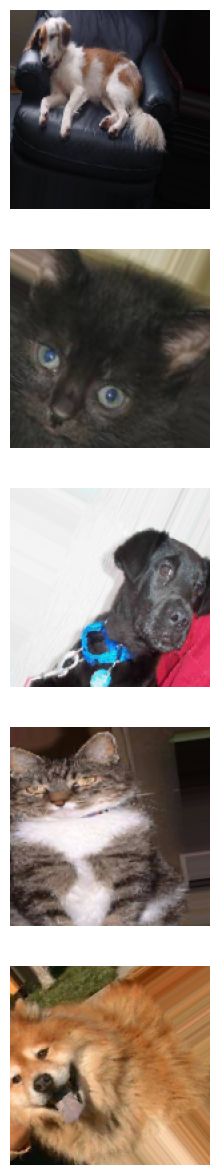

In [25]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [26]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill in new pixels after a transformation
)


Found 2000 images belonging to 2 classes.


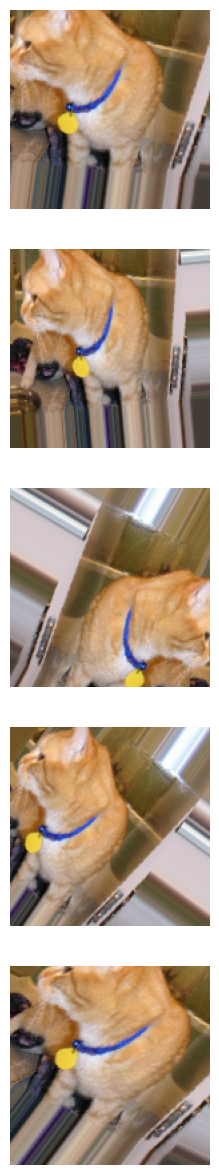

In [27]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [28]:
# 7
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        #Dropout(0.5),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ]
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [29]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 122s 8s/step - loss: 0.8449 - accuracy: 0.5160 - val_loss: 0.6914 - val_accuracy: 0.5915
Epoch 2/15
15/15 [==============================] - 122s 8s/step - loss: 0.6900 - accuracy: 0.5513 - val_loss: 0.6867 - val_accuracy: 0.5357
Epoch 3/15
15/15 [==============================] - 130s 9s/step - loss: 0.6747 - accuracy: 0.5534 - val_loss: 0.6788 - val_accuracy: 0.5391
Epoch 4/15
15/15 [==============================] - 131s 9s/step - loss: 0.6535 - accuracy: 0.6052 - val_loss: 0.6259 - val_accuracy: 0.6440
Epoch 5/15
15/15 [==============================] - 227s 16s/step - loss: 0.6359 - accuracy: 0.6448 - val_loss: 0.6064 - val_accuracy: 0.6819
Epoch 6/15
15/15 [==============================] - 234s 15s/step - loss: 0.6189 - accuracy: 0.6538 - val_loss: 0.5963 - val_accuracy: 0.6808
Epoch 7/15
15/15 [==============================] - 109s 7s/step - loss: 0.6431 - accuracy: 0.6245 - val_loss: 0.6218 - val_accuracy: 0.6775
Epoch 8/15


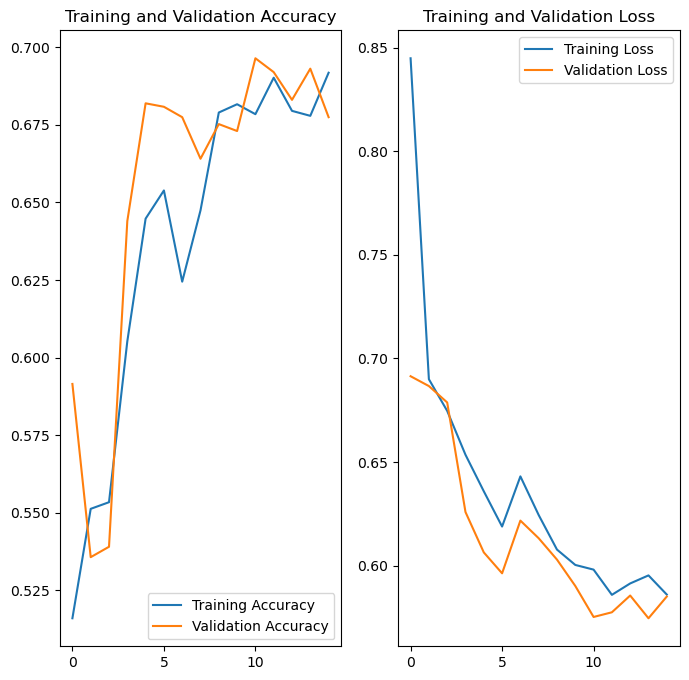

In [30]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 [==============================] - 1s 894ms/step


array([0.3618269 , 0.23259479, 0.0963935 , 0.6379775 , 0.39662609,
       0.36046758, 0.4866469 , 0.21141346, 0.27860096, 0.91700405,
       0.22610366, 0.38915768, 0.21625875, 0.19943821, 0.43651238,
       0.70463425, 0.49988726, 0.807476  , 0.5041524 , 0.5424152 ,
       0.18184043, 0.4206602 , 0.26246294, 0.4478874 , 0.4072138 ,
       0.34060788, 0.82774603, 0.3735763 , 0.24824938, 0.54928225,
       0.3514529 , 0.15851758, 0.5882505 , 0.99991155, 0.23309943,
       0.59009296, 0.995649  , 0.52785736, 0.29983822, 0.35954767,
       0.3147073 , 0.36370438, 0.9440534 , 0.41677   , 0.15767398,
       0.23490615, 0.32499775, 0.2657215 , 0.17614801, 0.32981184],
      dtype=float32)

In [35]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
